<a href="https://colab.research.google.com/github/mariarosariolacuna/DownTheRabbitHole/blob/main/The_Philippines_Stray_Cats_and_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Day 1 (Foundational Large Language Models & Prompt Engineering)

Kaggle -Day Gen AI Intensive Course

## Prompting

1. Zero-shot- prompts that describe the request for the model directly.
		Enum mode The Gemini API feature that allows you to constrain the output to a fixed set of values

2. One-shot- prompts that provide an example of the expected response.
3. Few-shot- prompts that provide multiple examples of the expected response.
		JSON mode The Gemini API feature to provide control over the schema, and to ensure that you only receive JSON (with no other text or markdown).

4. Chain of Thought (CoT)- prompting technique where you instruct the model to output intermediate reasoning steps, and it typically gets better results, especially when combined with few-shot examples.
		doesn't completely eliminate hallucinations
		tends to cost more to run, due to the increased token count

5. ReAct: Reason and act- prompting technique where you instruct the model to combines reasoning and action to solve complex tasks. Benefits are Improved accuracy:, Enhanced creativity, Better handling of ambiguity.
		reasoning about each step
		taking actions based on the reasoning



Code prompting
1. Generating code
2. Code execution
3. Explaining code



## Install the SDK (Software Development Kit)


In [18]:
%pip install -U -q "google-generativeai>=0.8.3"


In [20]:
import google.generativeai as genai
from IPython import get_ipython
from IPython.display import HTML, Markdown, display

## Set up your API key

In [3]:
from google.colab import userdata


GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

## Retry Policy
This part is typically used to implement a retry mechanism, which automatically re-sends requests if they fail due to transient errors like network issues or server timeouts.

In [8]:
from google.api_core import retry

# When running lots of queries, it's a good practice to use a retry policy so your code
# automatically retries when hitting Resource Exhausted (quota limit) errors.

retry_policy = {
    "retry": retry.Retry(predicate=retry.if_transient_error, initial=10, multiplier=1.5, timeout=300)}

# Define the model you want to use #Added this line to define the model you want to use
model = genai.models.Text.from_pretrained("gemini-1.5-flash-001")

for _ in range(5):
  response = model.generate_content("Write a persuasive essay on the urgent need for a comprehensive stray animal control program in the Philippines", request_options=retry_policy)



AttributeError: module 'google.generativeai' has no attribute 'models'

## generation parameters

gemini-1.5-flash-001 model:

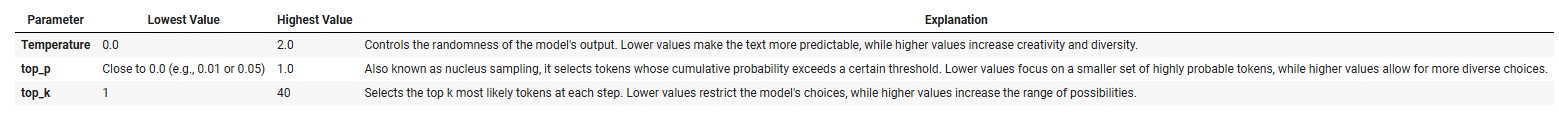



In [13]:
for model in genai.list_models():
  if model.name == 'models/gemini-1.5-flash':
    print(model)
    break

Model(name='models/gemini-1.5-flash',
      base_model_id='',
      version='001',
      display_name='Gemini 1.5 Flash',
      description=('Alias that points to the most recent stable version of Gemini 1.5 Flash, our '
                   'fast and versatile multimodal model for scaling across diverse tasks.'),
      input_token_limit=1000000,
      output_token_limit=8192,
      supported_generation_methods=['generateContent', 'countTokens'],
      temperature=1.0,
      max_temperature=2.0,
      top_p=0.95,
      top_k=40)


## Zero-shot


In [ ]:
model = genai.GenerativeModel(
    'gemini-1.5-flash-001'
)

zero_shot_prompt = """Write a persuasive essay on the urgent need for a comprehensive stray animal control program in the Philippines"""

response = model.generate_content(zero_shot_prompt, request_options=retry_policy)
print(response.text)

## A Sea of Unwanted: The Urgent Need for Comprehensive Stray Animal Control in the Philippines

The Philippines, a nation known for its vibrant culture and warm hospitality, faces a sobering reality: a rampant stray animal population posing a significant threat to public health, safety, and animal welfare. This crisis demands immediate attention, requiring a comprehensive and humane stray animal control program, one that prioritizes responsible management, ethical treatment, and long-term solutions.

The scale of the problem is undeniable. Uncontrolled breeding, irresponsible pet ownership, and lack of adequate animal shelters have led to a staggering number of strays roaming the streets. These animals often struggle for survival, facing starvation, disease, and the constant threat of injury or death due to traffic accidents or human cruelty. Beyond the suffering of these animals, their presence poses significant risks to human well-being. Stray dogs, particularly, can spread rabies, 

## One-Shot/Few-Shot

In [ ]:
few_shot_prompt = """ Analyze the effectiveness of various stray animal control programs in different countries.

Example:
Country: The Netherlands
Key Strategies: Sterilization, vaccination, and adoption programs
Success Factors Strong government support, community involvement, and education campaigns

Example:
Country Australia
Key Strategies Trap-neuter-return (TNR), adoption campaigns, and strict animal control laws
Success Factors Well-funded and coordinated approach, involvement of multiple stakeholders

Example:
Country Thailand
Key Strategies A focus on TNR programs and community education
Success Factors The involvement of local communities in caring for stray animals and a strong emphasis on humane treatment

Example:
Country India
Key Strategies A combination of sterilization, vaccination, and adoption programs, often implemented by NGOs and government agencies
Success Factors Large-scale sterilization campaigns, increased public awareness, and collaboration between different stakeholders

Prompt: Based on these examples, propose a comprehensive strategy to address the stray animal problem in the Philippines. Consider factors such as sterilization, adoption, and community education.
"""


animal_advocate_query = "Propose a solution to the stray animal problem in the Philippines"
response = model.generate_content([few_shot_prompt, animal_advocate_query], request_options=retry_policy)
print(response.text)

## A Comprehensive Strategy to Address the Stray Animal Problem in the Philippines:

Drawing inspiration from successful international models, a multifaceted approach is needed to address the stray animal problem in the Philippines. The proposed strategy incorporates elements from each country's successful approaches and adapts them to the unique context of the Philippines:

**1.  Sterilization and Vaccination:**

* **Large-scale Sterilization Campaigns:**  Following India's model, implement large-scale, government-supported sterilization campaigns for both male and female stray animals. Focus on high-density areas and areas with high reproduction rates.
* **Mobile Spay/Neuter Clinics:** Similar to the Netherlands, establish mobile spay/neuter clinics to reach remote communities and areas with limited access to veterinary services.
* **Community-Based Sterilization Programs:** Encourage and empower local communities to actively participate in sterilization programs through training and

## Chain of Thought (CoT)

In [ ]:
# Direct Prompting

prompt = """What are the primary causes of the stray animal problem in the Philippines? What are some effective solutions to address this issue?"""

model = genai.GenerativeModel('gemini-1.5-flash-latest')
response = model.generate_content(prompt, request_options=retry_policy)

print(response.text)

The stray animal problem in the Philippines is a complex issue stemming from a confluence of factors:

**Primary Causes:**

* **Lack of widespread and effective animal birth control programs:**  The most significant factor is the uncontrolled breeding of dogs and cats.  Limited access to spay/neuter services, coupled with a lack of awareness about responsible pet ownership, leads to exponential population growth.
* **Irresponsible pet ownership:** Many pet owners do not properly care for their animals, leading to abandonment or accidental breeding.  This includes failing to spay/neuter, inadequate housing, and lack of veterinary care.
* **Cultural attitudes:**  In some areas, there's a lack of understanding about the importance of responsible pet ownership and the negative consequences of stray animals.  Some view stray animals as a natural part of the environment, rather than a public health and welfare concern.
* **Inadequate animal welfare laws and enforcement:** Existing laws regar

In [ ]:
# try the same approach, but indicate to the model that it should "think step by step

prompt = """Let's break down the stray animal problem in the Philippines.
First, what are the main causes of this issue?
Once we identify the causes, we can brainstorm potential solutions.
What are some effective strategies to address overpopulation, lack of awareness, and inadequate resources?
Let's think step by step."""

model = genai.GenerativeModel('gemini-1.5-flash-latest')
response = model.generate_content(prompt, request_options=retry_policy)

print(response.text)

## The Stray Animal Problem in the Philippines: A Breakdown

The stray animal problem in the Philippines is a complex issue stemming from a confluence of factors.  Let's break down the main causes:

**Main Causes:**

1. **Irresponsible Pet Ownership:** This is arguably the biggest contributor.  Many people acquire pets impulsively, without understanding the commitment involved in providing proper care, including food, shelter, veterinary care, and sterilization.  Once the novelty wears off, or circumstances change, animals are often abandoned, leading to an increase in the stray population.

2. **Lack of widespread and effective sterilization programs:**  Without widespread and readily accessible sterilization (spaying and neutering) programs, the stray population multiplies exponentially.  Limited resources and lack of public awareness hinder the implementation of effective birth control measures.

3. **Inadequate Animal Welfare Laws and Enforcement:** While laws exist, enforcement is

In [ ]:
Markdown(response.text)

## The Stray Animal Problem in the Philippines: A Breakdown

The stray animal problem in the Philippines is a complex issue stemming from a confluence of factors.  Let's break down the main causes:

**Main Causes:**

1. **Irresponsible Pet Ownership:** This is arguably the biggest contributor.  Many people acquire pets impulsively, without understanding the commitment involved in providing proper care, including food, shelter, veterinary care, and sterilization.  Once the novelty wears off, or circumstances change, animals are often abandoned, leading to an increase in the stray population.

2. **Lack of widespread and effective sterilization programs:**  Without widespread and readily accessible sterilization (spaying and neutering) programs, the stray population multiplies exponentially.  Limited resources and lack of public awareness hinder the implementation of effective birth control measures.

3. **Inadequate Animal Welfare Laws and Enforcement:** While laws exist, enforcement is often lax.  This leads to a lack of accountability for irresponsible pet owners and hinders the effective management of stray populations.  Weak penalties for animal cruelty also contribute to the problem.

4. **Cultural Attitudes and Beliefs:** In some areas, there's a lack of awareness regarding responsible pet ownership and the importance of sterilization.  Certain cultural beliefs or superstitions may also contribute to the problem.

5. **Limited Resources:**  Government resources allocated to animal welfare are often insufficient to address the scale of the problem.  Shelters are frequently overcrowded and underfunded, lacking the capacity to effectively manage the stray population.  This includes a shortage of qualified veterinarians and animal welfare professionals.


**Potential Solutions:**

To address the problem effectively, a multi-pronged approach is necessary, targeting the root causes identified above:

**Addressing Overpopulation:**

* **Mass Sterilization Campaigns:** Implement large-scale, free or low-cost spay/neuter programs for both owned and stray animals, targeting high-density areas. This should be combined with public education campaigns to promote the benefits.
* **Trap-Neuter-Return (TNR) Programs:**  Implement well-organized TNR programs, where stray animals are trapped, sterilized, vaccinated, and then returned to their territory to prevent further breeding.  This is a humane approach that focuses on population control rather than eradication.
* **Improved Shelter Management:** Improve the infrastructure and capacity of animal shelters, ensuring they are adequately staffed, funded, and equipped to handle the influx of animals.  This could include partnerships with private organizations and veterinary schools.


**Addressing Lack of Awareness:**

* **Public Education Campaigns:** Launch widespread public awareness campaigns targeting responsible pet ownership, the importance of sterilization, and the consequences of animal abandonment.  Utilize various media channels – television, radio, social media, schools – to reach a broad audience.
* **Community Outreach Programs:** Engage with communities directly through workshops, seminars, and interactive events to educate people about animal welfare and responsible pet ownership.  Target schools and youth groups for long-term impact.
* **Collaborations with Local Governments:** Work closely with local governments to integrate animal welfare education into existing community programs.


**Addressing Inadequate Resources:**

* **Increased Government Funding:** Advocate for increased government funding specifically allocated to animal welfare programs, including sterilization campaigns, shelter improvements, and enforcement of animal welfare laws.
* **Private Sector Partnerships:**  Encourage partnerships between government agencies, animal welfare organizations, and the private sector to leverage resources and expertise.  This could involve corporate sponsorships, volunteer programs, and fundraising initiatives.
* **Improved Enforcement of Existing Laws:**  Strengthen enforcement of existing animal welfare laws and impose stricter penalties for animal cruelty and irresponsible pet ownership.  This requires more resources for animal control officers and a robust judicial system.


**Implementation Strategies:**

Successful implementation requires strong collaboration between government agencies, animal welfare organizations, and the community.  A phased approach, starting with pilot programs in specific areas, could be effective.  Regular monitoring and evaluation are crucial to assess the effectiveness of strategies and make necessary adjustments.  Transparency and accountability in the use of resources are also vital for building public trust and ensuring long-term success.


## ReAct: Reason and act

Note: The prompt and in-context examples used here are from https://github.com/ysymyth/ReAct which is published under a MIT license, Copyright (c) 2023 Shunyu Yao.

In [23]:
model = genai.GenerativeModel(
    'gemini-1.5-flash-001'
)

In [24]:
model_instructions = """
Solve a question answering task with interleaving Thought, Action, Observation steps. Thought can reason about the current situation,
Observation is understanding relevant information from an Action's output and Action can be one of three types:
  (1) <search>entity</search>, which searches the exact entity on Wikipedia and returns the first paragraph if it exists. If not, it
      will return some similar entities to search and you can try to search the information from those topics.
  (2) <lookup>keyword</lookup>, which returns the next sentence containing keyword in the current context. This only does exact matches,
      so keep your searches short.
  (3) <finish>answer</finish>, which returns the answer and finishes the task.
"""

example1 = """Question
Musician and satirist Allie Goertz wrote a song about the "The Simpsons" character Milhouse, who Matt Groening named after who?

Thought 1
The question simplifies to "The Simpsons" character Milhouse is named after who. I only need to search Milhouse and find who it is named after.

Action 1
<search>Milhouse</search>

Observation 1
Milhouse Mussolini Van Houten is a recurring character in the Fox animated television series The Simpsons voiced by Pamela Hayden and created by Matt Groening.

Thought 2
The paragraph does not tell who Milhouse is named after, maybe I can look up "named after".

Action 2
<lookup>named after</lookup>

Observation 2
Milhouse was named after U.S. president Richard Nixon, whose middle name was Milhous.

Thought 3
Milhouse was named after U.S. president Richard Nixon, so the answer is Richard Nixon.

Action 3
<finish>Richard Nixon</finish>
"""

example2 = """Question
What is the elevation range for the area that the eastern sector of the Colorado orogeny extends into?

Thought 1
I need to search Colorado orogeny, find the area that the eastern sector of the Colorado orogeny extends into, then find the elevation range of the area.

Action 1
<search>Colorado orogeny</search>

Observation 1
The Colorado orogeny was an episode of mountain building (an orogeny) in Colorado and surrounding areas.

Thought 2
It does not mention the eastern sector. So I need to look up eastern sector.

Action 2
<lookup>eastern sector</lookup>

Observation 2
The eastern sector extends into the High Plains and is called the Central Plains orogeny.

Thought 3
The eastern sector of Colorado orogeny extends into the High Plains. So I need to search High Plains and find its elevation range.

Action 3
<search>High Plains</search>

Observation 3
High Plains refers to one of two distinct land regions

Thought 4
I need to instead search High Plains (United States).

Action 4
<search>High Plains (United States)</search>

Observation 4
The High Plains are a subregion of the Great Plains. From east to west, the High Plains rise in elevation from around 1,800 to 7,000 ft (550 to 2,130m).

Thought 5
High Plains rise in elevation from around 1,800 to 7,000 ft, so the answer is 1,800 to 7,000 ft.

Action 5
<finish>1,800 to 7,000 ft</finish>
"""



In [25]:
question = """Question
How successful have the solutions to the stray animal problem been in the Philippines?
"""

model = genai.GenerativeModel('gemini-1.5-flash-latest')
react_chat = model.start_chat()

# You will perform the Action, so generate up to, but not including, the Observation.
config = genai.GenerationConfig(stop_sequences=["\nObservation"])

resp = react_chat.send_message(
    [model_instructions, example1, example2, question],
    generation_config=config,
    request_options=retry_policy)
print(resp.text)

Thought 1
I need to find information about stray animal solutions in the Philippines and assess their success.  A broad search on the topic should provide a starting point.

Action 1
<search>stray animal solutions Philippines</search>



In [26]:
#Now you can perform this research yourself and supply it back to the model.

observation = """Observation 1
The Philippines is home to a large population of stray animals, including cats and dogs, that are often euthanized due to a lack of resources and space:
Number of stray animals
As of 2019, there were around 12 million stray cats and dogs in the Philippines. The Mars Petcare Pet Homelessness Project report estimates that there are now 13.11 million stray animals.
Euthanasia
Hundreds of stray animals are euthanized each month in municipal pounds. This is often due to a lack of space and resources, and because the pet adoption rate is less than 1%.
Rabies
The Philippines is one of the countries with the highest rabies incidence in the world. This is because stray animals often lack proper care and vaccinations.
Askal and aspin
The diverse population of free-ranging mongrel dogs in the Philippines are called askal, which is a portmanteau of asong kalye meaning "street dog". They are also called aspin, which is a portmanteau of asong Pinoy meaning "Filipino dog"
"""
resp = react_chat.send_message(observation, generation_config=config, request_options=retry_policy)
print(resp.text)

Thought 2
The observation describes the scale of the problem (millions of stray animals) and mentions euthanasia as a common solution due to resource constraints and low adoption rates.  It also highlights rabies as a significant concern. This doesn't directly address the *success* of solutions, however. I need to find information on specific interventions and their impact.

Action 2
<search>stray animal control programs Philippines effectiveness</search>



In [30]:
observation = """Observation 2
The most effective and permanent way to control stray cats in the Philippines is Trap-Neuter-Vaccinate-Return (TNVR). The Philippine Animal Welfare Society (PAWS) can help organize a TNVR in your community
Other programs and laws that address stray animals in the Philippines include:
Republic Act No. 9482 Also known as the “Anti-Rabies Act of 2007,” this law aims to control rabies by addressing stray dogs.
Republic Act 10631 Also known as the Philippine Animal Welfare Act of 2013, this law includes provisions for responsible pet ownership, such as requiring pets to be vaccinated, registered, and cared for properly
DENR-Biodiversity Management Bureau (BMB) This program works to preserve, conserve, and protect wildlife, and maintain, restore, and enhance their habitats.
"""
resp = react_chat.send_message(observation, generation_config=config, request_options=retry_policy)
print(resp.text)

Thought 3: Observation 2 mentions several initiatives: TNVR, Republic Act No. 9482 (Anti-Rabies Act), Republic Act 10631 (Animal Welfare Act), and the DENR-BMB program.  However, it doesn't assess their success.  The description of TNVR as "the most effective and permanent way" is a claim, not a statement of proven success.  I need to find evaluations of these programs' effectiveness.

Action 3: <search>effectiveness of Philippine stray animal control programs</search>



In [31]:
observation = """Observation 3
Partners, not pounds: There is more to animal welfare than rounding up strays
Stray Animal Population Control - World's Veterinary Journal
KabaliCAT (TNR)
Stray Animal Population Control: Methods, Public Health Concern, Ethics, and Animal Welfare Issues
Senator Mark Villar Encourages Heightened Stray Animals Adoption and Lessened Abandonment Through Legislation
Solon seeks to address rising cases of animal abandonment
Legal Remedies for Managing Stray Animal Populations by Local Government Units in the Philippines
Simplified Query: What are the legal remedies available for Local Government Units to manage stray animal populations in the Philippines?

In the Philippines, managing stray animal populations, particularly dogs, is a significant issue for Local Government Units (LGUs) due to the potential risk of rabies and other public health concerns. LGUs play a crucial role in implementing strategies and legal remedies to address this problem effectively.

Relevant Legal Framework and Actions:

Republic Act No. 9482 (Anti-Rabies Act of 2007): This Act provides a direct mandate to LGUs to actively engage in the control and elimination of rabies. It requires LGUs to establish and maintain a pound, promote responsible pet ownership, and conduct regular dog vaccinations and registration.

Local Government Code of 1991 (Republic Act No. 7160): Under this code, LGUs have the authority to enact ordinances that can address public health issues caused by stray animals. This includes creating local rules that may define the process for impounding, rescuing, and managing stray animals.

Animal Welfare Act (Republic Act No. 8485 as amended by RA 10631): This Act emphasizes the humane treatment of all animals and outlines the responsibilities of animal owners for their pet's welfare. LGUs must ensure that these standards are upheld in their jurisdictions, including the humane capture and management of strays.

Steps LGUs Can Implement:

Enforcement of Local Ordinances: LGUs should enforce ordinances that regulate the keeping of pets and the impoundment of stray animals. These ordinances can include fines for pet owners who allow their animals to roam freely and regulations about the number of pets allowed per household.

Stray Animal Population Control: Initiatives such as spaying and neutering programs are effective at controlling the population of stray animals. LGUs can organize free or subsidized spay/neuter clinics as part of their animal control programs.

Public Education Campaigns: Educating the public about responsible pet ownership and the importance of spaying and neutering can reduce the number of animals that end up as strays. Campaigns should also inform the public about how to safely interact with stray animals and the importance of reporting strays to the local authorities.

Partnerships and Collaboration: LGUs can collaborate with non-governmental organizations (NGOs), veterinary associations, and animal welfare groups to enhance their animal control programs. These partnerships can provide additional resources, expertise, and funding.

Establishment of Animal Shelters: Creating shelters that meet the guidelines set by the Animal Welfare Act is essential. These facilities provide a space to house strays safely and humanely while awaiting adoption or reclaiming by their owners.

Conclusion:

The challenge of managing stray animal populations requires a multifaceted approach by LGUs. By implementing legal measures, enforcing local ordinances, and promoting community education, LGUs can effectively address the public health risks associated with stray animals and improve the welfare of these animals in their communities.
"""
resp = react_chat.send_message(observation, generation_config=config, request_options=retry_policy)
print(resp.text)

Thought 4: Observation 3 provides a detailed overview of the legal framework and actions LGUs can take to manage stray animals.  It highlights several strategies (enforcement of ordinances, spay/neuter programs, public education, partnerships) but still doesn't offer a conclusion on the *overall success* of these efforts in reducing the stray animal population or improving animal welfare outcomes.  The text emphasizes *what* can be done, not *how well* it's being done.

Action 4: <search> success rate of Philippine stray animal control programs</search>




In [32]:
observation = """Observation 4
There isn't much information about the success rate of stray animal control programs in the Philippines, but here's some information about stray animals in the country:
Euthanasia
Many stray animals in the Philippines are euthanized in pounds or die of disease, hunger, or wounds from fighting. The pet adoption rate in the Philippines is less than 1%
Trap-neuter-return
Some say that trap-neuter-return (TNR) is an effective way to control the stray animal population in a humane way. However, one agency in the Philippines says that TNR would be illegal because all animals must be kept in homes or other establishments.
Desexing
Some clinics in the Philippines offer free mass desexing programs to help control the stray animal population.
Animal welfare
The Philippine Animal Welfare Society (PAWS) has been working to protect animals and promote humane treatment since 1954. PAWS monitors cases of animal cruelty and provides legal assistance to pet owners.
Animal rights laws
Authorities can design and enact animal rights laws to help control the stray animal population
"""
resp = react_chat.send_message(observation, generation_config=config, request_options=retry_policy)
print(resp.text)

Thought 5: Observation 4 confirms a lack of readily available data on the success rates of Philippine stray animal control programs. While it mentions various approaches (euthanasia, TNR, desexing, PAWS activities), it doesn't quantify their impact.  The low adoption rate (less than 1%) suggests a significant challenge in reducing the stray population. The conflicting information regarding the legality of TNR further highlights the complexity of the issue.

Action 5: <finish>Available data on the success of stray animal control programs in the Philippines is limited.  While various methods are employed, including euthanasia, trap-neuter-return (TNR), and desexing programs,  there's no readily available information to quantify their effectiveness in reducing the large stray animal population. The extremely low pet adoption rate suggests a significant ongoing challenge.</finish>



In [35]:
prompt = """As an animal advocate, Write a simple and easy to understand essay on the stray animal problem in the Philippines, drawing on the insights gained from the ReAct process."""

model = genai.GenerativeModel('gemini-1.5-flash-latest')
response = model.generate_content(prompt, request_options=retry_policy)

print(response.text)

## The Philippine Stray Animal Crisis: A ReAct Approach

The Philippines faces a significant challenge with its large population of stray animals, particularly dogs and cats. This isn't simply a matter of aesthetics; it's a complex issue affecting animal welfare, public health, and even the economy.  Understanding this problem requires a ReAct approach – recognizing, evaluating, acting, and continuing to adapt our strategies.

**Recognizing the Problem:**  The sheer number of stray animals in the Philippines is staggering.  Many are abandoned pets, while others are the offspring of uncontrolled breeding.  This leads to overcrowding in shelters (if they exist), suffering from hunger, disease, and injuries.  Beyond the direct suffering of these animals, there's a risk of rabies transmission to humans, increased traffic accidents involving animals, and potential environmental impacts.  This isn't just a problem in rural areas; major cities also grapple with significant stray populations.


In [36]:
Markdown(response.text)

## The Philippine Stray Animal Crisis: A ReAct Approach

The Philippines faces a significant challenge with its large population of stray animals, particularly dogs and cats. This isn't simply a matter of aesthetics; it's a complex issue affecting animal welfare, public health, and even the economy.  Understanding this problem requires a ReAct approach – recognizing, evaluating, acting, and continuing to adapt our strategies.

**Recognizing the Problem:**  The sheer number of stray animals in the Philippines is staggering.  Many are abandoned pets, while others are the offspring of uncontrolled breeding.  This leads to overcrowding in shelters (if they exist), suffering from hunger, disease, and injuries.  Beyond the direct suffering of these animals, there's a risk of rabies transmission to humans, increased traffic accidents involving animals, and potential environmental impacts.  This isn't just a problem in rural areas; major cities also grapple with significant stray populations.

**Evaluating the Causes:**  Several factors contribute to this crisis.  Lack of responsible pet ownership, including insufficient sterilization and lack of awareness about animal welfare, is a primary concern.  Inadequate enforcement of animal control laws, limited resources for animal shelters and welfare organizations, and a deeply ingrained cultural perspective that undervalues animal life all play a role.  Economic hardship can also contribute, forcing owners to abandon their pets.

**Acting for Solutions:**  We need a multi-pronged approach.  Firstly, **education** is crucial. Public awareness campaigns focusing on responsible pet ownership, the importance of sterilization (spaying and neutering), and the ethical treatment of animals are vital.  Secondly, **strengthening animal control laws** and ensuring their effective enforcement is essential.  This includes penalties for irresponsible pet ownership and stricter regulations on breeding. Thirdly, we need to **invest in and support animal welfare organizations**, providing them with the resources to operate effectively, including shelters, veterinary care, and community outreach programs.  Finally, promoting **community-based initiatives**, such as Trap-Neuter-Return (TNR) programs, can significantly reduce stray populations humanely.

**Continuing to Adapt:** The stray animal problem isn't static.  What works in one community might not work in another. We need ongoing evaluation and adaptation of our strategies.  This includes monitoring the impact of our actions, gathering data on stray populations, and adjusting our approaches based on the results.  Collaboration between government agencies, animal welfare organizations, and communities is key to ensuring a sustained and effective response.


In conclusion, solving the stray animal problem in the Philippines demands a comprehensive and compassionate approach. By adopting a ReAct framework, focusing on education, responsible legislation, and community engagement, we can significantly improve the lives of stray animals and create a more humane and sustainable future for all.


In [37]:
prompt = """As an animal advocate, Write a simple and easy to understand essay on the stray animal problem in the Philippines, drawing on the insights gained from the ReAct process.List down important takeaways and solutions for readers to easily read."""

model = genai.GenerativeModel('gemini-1.5-flash-latest')
response = model.generate_content(prompt, request_options=retry_policy)

print(response.text)

## The Stray Animal Crisis in the Philippines: A ReAct Approach

The Philippines faces a significant challenge with its large population of stray animals, particularly dogs and cats.  This isn't just a matter of aesthetics; it's a complex welfare, public health, and environmental issue demanding a comprehensive, compassionate solution. Using the ReAct process – **Recognize, Evaluate, Act, Communicate, and Track** –  we can better understand and address this problem.

**Recognize:** The sheer number of stray animals is readily apparent in almost every Philippine community.  We see them on streets, in landfills, and even in residential areas.  This isn't simply a matter of stray animals roaming freely; it signifies a deeper problem encompassing irresponsible pet ownership, lack of animal birth control, and inadequate resources for animal welfare.  Many stray animals are malnourished, diseased, and vulnerable to abuse and injury.

**Evaluate:** The consequences are far-reaching.  Stray an

In [38]:
Markdown(response.text)

## The Stray Animal Crisis in the Philippines: A ReAct Approach

The Philippines faces a significant challenge with its large population of stray animals, particularly dogs and cats.  This isn't just a matter of aesthetics; it's a complex welfare, public health, and environmental issue demanding a comprehensive, compassionate solution. Using the ReAct process – **Recognize, Evaluate, Act, Communicate, and Track** –  we can better understand and address this problem.

**Recognize:** The sheer number of stray animals is readily apparent in almost every Philippine community.  We see them on streets, in landfills, and even in residential areas.  This isn't simply a matter of stray animals roaming freely; it signifies a deeper problem encompassing irresponsible pet ownership, lack of animal birth control, and inadequate resources for animal welfare.  Many stray animals are malnourished, diseased, and vulnerable to abuse and injury.

**Evaluate:** The consequences are far-reaching.  Stray animals contribute to the spread of rabies and other zoonotic diseases, posing a direct threat to public health.  They can cause traffic accidents and pose safety concerns, particularly for children.  The environmental impact includes issues related to waste management as stray animals scavenge for food.  Furthermore, the emotional toll on those who witness animal suffering is significant.

**Act:**  Solving this problem requires a multi-pronged approach:

* **Strengthening Animal Birth Control (ABC) Programs:**  Mass sterilization and vaccination campaigns are crucial to curb population growth.  These programs need proper funding, skilled personnel, and community buy-in.
* **Promoting Responsible Pet Ownership:** Education campaigns targeting communities are vital.  This includes teaching responsible breeding practices, the importance of spaying/neutering, and proper animal care.  Promoting adoption over purchasing from breeders is also key.
* **Improving Animal Shelters and Welfare Organizations:**  Existing shelters need better infrastructure, funding, and resources to provide adequate care for rescued animals.  Support for animal rescue organizations is crucial.
* **Enacting and Enforcing Animal Welfare Laws:**  Stronger laws regarding animal cruelty, responsible ownership, and the control of stray animal populations are essential, coupled with effective enforcement mechanisms.
* **Community Involvement:** Encouraging community participation in feeding programs, cleaning campaigns, and reporting animal abuse can make a significant difference.

**Communicate:**  Open communication is vital.  This includes raising public awareness through educational campaigns, engaging with local government units, and collaborating with NGOs and animal welfare organizations to share best practices and coordinate efforts.  Transparency about the progress and challenges of implemented programs is essential.

**Track:**  Regular monitoring and evaluation of implemented programs are crucial to measure their effectiveness and make necessary adjustments. This includes tracking the number of sterilized animals, the incidence of rabies cases, and the overall impact on the stray animal population.


**Important Takeaways:**

* The stray animal problem is a complex issue requiring a holistic approach.
*  ABC programs are critical for population control.
*  Responsible pet ownership is paramount.
*  Collaboration between government, NGOs, and the community is crucial.
*  Consistent monitoring and evaluation are essential for success.

**Solutions:**  Focus on implementing effective ABC programs, promoting responsible pet ownership through education, strengthening animal welfare laws and their enforcement, supporting animal shelters, and fostering community involvement.


By adopting a ReAct approach, the Philippines can make significant progress in addressing the stray animal crisis, creating a safer, healthier, and more compassionate environment for both humans and animals.
